In [28]:
# 날짜: 05/30 작성자: 송승민 작성목적: 결측치 확인, 데이터 전처리 & 데이터 셋 생성 & 시각화
# 주제 세대 별 구매금액 및 구매상품종류 분석

In [1]:
# 필요한 패키지들 import작업
import pandas as pd
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
# csv데이터 파일 가져오기
customer = pd.read_csv("customer.csv")
sales = pd.read_csv("sales.csv")
store = pd.read_csv("store.csv")

In [14]:
# null값 확인
print(customer.isnull().sum())
print(sales.isnull().sum())
print(store.isnull().sum())

# 데이터크기 확인
print(customer.shape)
print(sales.shape)
print(store.shape)

고객ID     0
성별       0
연령       0
거주지역    15
dtype: int64
고객ID      0
거래식별ID    0
점포ID      0
거래일자      0
거래시간대     0
상품대분류명    0
상품중분류명    0
구매건수      0
구매금액      0
dtype: int64
고객ID     0
가맹점ID    0
거래일자     0
구매금액     0
적립포인트    0
사용포인트    0
dtype: int64
(5000, 4)
(57198, 9)
(26044, 6)


In [15]:
customer = customer.fillna('없음')
print(customer.isnull().sum())

고객ID    0
성별      0
연령      0
거주지역    0
dtype: int64


In [16]:
merger_csales = pd.merge(customer, sales, on='고객ID', how='inner')
merger_csales['연령대'] = (merger_csales['연령']//10) * 10
merger_csales

,고객ID,성별,연령,거주지역,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매건수,구매금액,연령대
0,Q05910452,F,29,서울 서초구 서초4동,A027152,BB,20140408,20,야채,두채류,1,4590,20
1,Q05910452,F,29,서울 서초구 서초4동,A027373,BB,20140414,20,청과,건과,1,2585,20
2,Q05910452,F,29,서울 서초구 서초4동,A027620,BB,20140420,19,야채,근채류,1,1990,20
3,Q05910452,F,29,서울 서초구 서초4동,A027895,BB,20140428,13,음주류,음료,1,590,20
4,Q05910452,F,29,서울 서초구 서초4동,A027942,BB,20140429,19,야채,두채류,1,3450,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57193,Q34149506,F,51,경북 경주시 동천동,A057632,DD,20140724,19,음주류,주류,8,12430,50
57194,Q34149506,F,51,경북 경주시 동천동,A057632,DD,20140724,19,일반식품,즉석식품,2,3980,50
57195,Q34149506,F,51,경북 경주시 동천동,A058315,DD,20140801,20,음주류,기타음주류,1,40,50
57196,Q34149506,F,51,경북 경주시 동천동,A058315,DD,20140801,20,음주류,음료,1,820,50


In [17]:
# 연령대 확인
merger_csales['연령대'].describe()
# 70대가 최고 연령대임을 확인

count    57198.000000
mean        42.006888
std         12.301702
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         70.000000
Name: 연령대, dtype: float64

In [18]:
# 연령대 별 구매금액(합계, 평균, 거래건수)
csales_age_sum = merger_csales.groupby('연령대').구매금액.sum().reset_index()
csales_age_avg = merger_csales.groupby('연령대').구매금액.mean().reset_index()
# 거래건수
csales_age_cnt = merger_csales.groupby('연령대').구매건수.count().reset_index()
# 전체 상품 품목 거래건수
csales_good_cnt = merger_csales.groupby('상품대분류명').구매건수.count().reset_index()
csales_age_sum
csales_age_avg
csales_age_cnt
csales_good_cnt

,상품대분류명,구매건수
0,곡물,768
1,낙농,6043
2,냉동,1597
3,냉장,2969
4,델리카,2523
5,면과자,7190
6,수산,2684
7,야채,11758
8,음주류,5280
9,일반식품,2795


In [20]:
# 상품분류 별 구매금액
csales_good_sum = merger_csales_sum.sort_values(by='구매금액',ascending=True).reset_index(drop=True)


NameError: name 'merger_csales_sum' is not defined

In [9]:
# 거래 시, 품목 별 구매금액 합계의 막대그래프

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('font', size=8)
plt.rcParams['axes.unicode_minus'] =False

goods = csales_good_sum.상품대분류명
pay_sum = csales_good_sum.구매금액

plt.figure(figsize=(8,8))
plt.ylim(6000000,40000000)
plt.bar(goods,pay_sum)
plt.show()

NameError: name 'csales_good_sum' is not defined

In [33]:
# 10살 단위로 고객들 분류
csales_20 = merger_csales[merger_csales['연령대'].isin([20])]
csales_30 = merger_csales[merger_csales['연령대'].isin([30])]
csales_40 = merger_csales[merger_csales['연령대'].isin([40])]
csales_50 = merger_csales[merger_csales['연령대'].isin([50])]
csales_60 = merger_csales[merger_csales['연령대'].isin([60])]
csales_70 = merger_csales[merger_csales['연령대'].isin([70])]

In [34]:
csales_20_price = csales_20.groupby('거래식별ID').구매금액.mean().reset_index()
csales_30_price = csales_30.groupby('거래식별ID').구매금액.mean().reset_index()
csales_40_price = csales_40.groupby('거래식별ID').구매금액.mean().reset_index()

<Figure size 800x800 with 0 Axes>

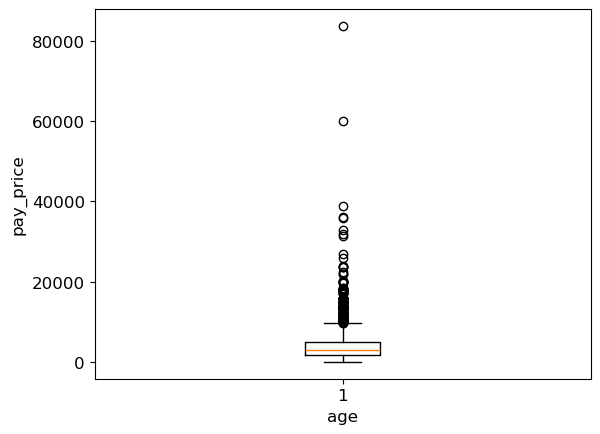

In [35]:
# 20대 고객의 한 번 거래당 구매금액의 박스모양

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['font.size'] = 12

a = csales_20_price.구매금액
b = csales_30_price.구매금액
c = csales_40_price.구매금액

plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

ax.boxplot([a])
ax.set_xlabel('age')
ax.set_ylabel('pay_price')

plt.show()

In [39]:
# 20대 구매금액 정렬
csales_20_price_sort = csales_20_price.sort_values(by='구매금액',ascending=True).reset_index(drop=True)
csales_20_price_sort

,거래식별ID,구매금액
0,A008793,40.0
1,A010497,40.0
2,A018989,40.0
3,A022091,50.0
4,A055250,50.0
...,...,...
2873,A060606,35850.0
2874,A045892,36200.0
2875,A001868,38900.0
2876,A061167,60000.0


In [52]:
csales_20_price_sort

# 이상치 제거

csales_20_noraml = csales_20_price_sort[csales_20_price_sort['구매금액'] <= 10000]
csales_20_noraml

,거래식별ID,구매금액
0,A008793,40.0
1,A010497,40.0
2,A018989,40.0
3,A022091,50.0
4,A055250,50.0
...,...,...
2732,A058856,10000.0
2733,A029096,10000.0
2734,A014808,10000.0
2735,A039212,10000.0


<Figure size 800x800 with 0 Axes>

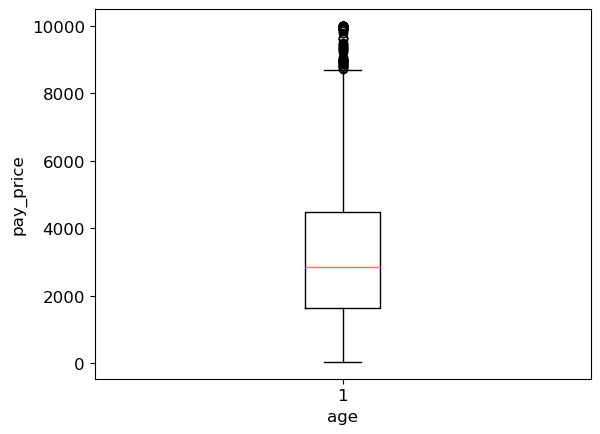

In [53]:
# 20대 고객의 한 번 거래당 구매금액의 박스모양(극단적 이상치 제거)

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['font.size'] = 12

a = csales_20_noraml['구매금액']


plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

ax.boxplot([a])
ax.set_xlabel('age')
ax.set_ylabel('pay_price')

plt.show()